In [1]:
import gym
from final_project.envs.opt_env import OptEnv, obs_arr_to_object, obs_object_to_arr
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import A2C, PPO

env = gym.make('opt-env-v0', N=2, eps=1e-3)

In [2]:
env.set_mode('train')
model = PPO('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=50000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
[0.95238095 0.95238095]
[1.05       0.95238095]
[0.95238095 1.05      ]
[1.05 1.05]
[0.95238095 0.95238095]
[0.95238095 0.95238095]
[0.95238095 0.95238095]
[0.95238095 1.05      ]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.13     |
|    ep_rew_mean     | -43.7    |
| time/              |          |
|    fps             | 1547     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.93        |
|    ep_rew_mean          | -51.9       |
| time/                   |             |
|    fps                  | 1153        |
|    iterations           | 2           |
|    time_elapsed         | 3           |
|    total_timesteps      | 4096        |
| train/

KeyboardInterrupt: 

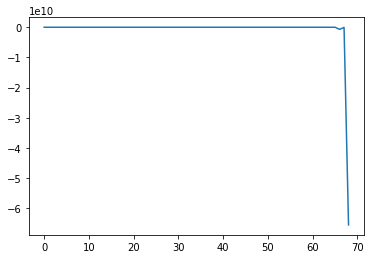

In [6]:
env.set_mode('test')

obs = env.reset()
obs_obj = obs_arr_to_object(obs, env.N)

done = False
rewards = []
obj_vals = []
ds = []
g_norms = []
actions = []

i = 0
while not done:
    prev = obs_obj.prev_it
    cur = obs_obj.cur_it

    # s = cur.x - prev.x
    # y = cur.g - prev.g
    # alpha = (y@s)/(y@y)
    # action = alpha*np.ones(env.N) / obs_obj.d
    action = model.predict(obs)[0]
    # print(action)
    
    obs, reward, done, info = env.step(action)
    obs_obj = obs_arr_to_object(obs, env.N)

    rewards += [reward]
    actions += [action]
    obj_vals += [obs_obj.cur_it.obj]
    ds += [obs_obj.d]
    g = obs_obj.cur_it.g
    g_norm = np.linalg.norm(g)
    g_norms += [g_norm]
    i += 1

# plt.yscale('log')
# plt.plot(np.arange(i), np.sqrt(-np.array(g_normsq_list)))
plt.plot(np.arange(i), np.array(rewards))

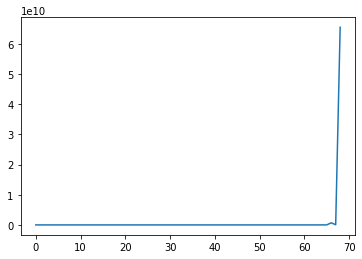

In [7]:
plt.plot(np.arange(i), np.array(obj_vals))

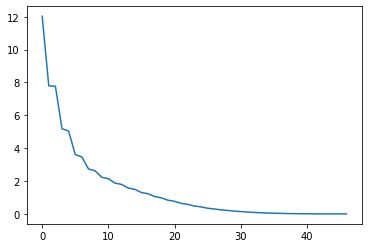

In [18]:
plt.plot(np.arange(i), np.array(g_norms))

In [19]:
info['notes']

['success!']

In [15]:
env.max_iter, env.j

(500, 184)

In [8]:
actions

[array([0., 1.], dtype=float32),
 array([1., 1.], dtype=float32),
 array([1., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([1., 1.], dtype=float32),
 array([1., 1.], dtype=float32),
 array([1., 1.], dtype=float32),
 array([1., 1.], dtype=float32),
 array([1., 1.], dtype=float32),
 array([1., 1.], dtype=float32),
 array([1., 1.], dtype=float32),
 array([1., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([1., 1.], dtype=float32),
 array([1., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([1., 1.], dtype=float32),
 array([1., 1.], dtype=float32),
 array([1., 1.], dtype=float32),
 array([1., 1.], dtype=float32),
 array([1., 1.], dtype=float32),
 array([1., 1.], dtype=float32),
 array([1., 1.], dtype=float32),
 array([1., 1.], dtype=float32),
 array([1., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([1., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([1., 1.], dtype=float32),
 array([1.

In [9]:
rewards

[-4.090024174921091,
 -4.0523661162695594,
 -4.052360995819103,
 -4.016612951369299,
 -4.017822053499938,
 -3.983824247219922,
 -3.9853266368029043,
 -3.9529743148547425,
 -3.954274513847052,
 -3.9222198994750057,
 -3.9250574967576153,
 -3.8928304932149516,
 -3.8971363729643302,
 -3.8663222983001027,
 -3.871951771345737,
 -3.8424114514565777,
 -3.8492342234534997,
 -3.81991030180081]

In [9]:
ds

[array([0.0952381, 0.105    ]),
 array([0.1    , 0.11025]),
 array([0.105    , 0.1157625]),
 array([0.1       , 0.12155063]),
 array([0.105     , 0.12762816]),
 array([0.11025   , 0.13400956]),
 array([0.1157625 , 0.14071004]),
 array([0.12155063, 0.14774554]),
 array([0.12762816, 0.15513282]),
 array([0.13400956, 0.16288946]),
 array([0.14071004, 0.17103394]),
 array([0.14774554, 0.17958563]),
 array([0.14071004, 0.18856491]),
 array([0.14774554, 0.19799316]),
 array([0.15513282, 0.20789282]),
 array([0.14774554, 0.21828746]),
 array([0.15513282, 0.22920183]),
 array([0.16288946, 0.24066192]),
 array([0.17103394, 0.25269502]),
 array([0.17958563, 0.26532977]),
 array([0.18856491, 0.27859626]),
 array([0.19799316, 0.29252607]),
 array([0.20789282, 0.30715238]),
 array([0.21828746, 0.32250999]),
 array([0.22920183, 0.33863549]),
 array([0.21828746, 0.35556727]),
 array([0.22920183, 0.37334563]),
 array([0.21828746, 0.39201291]),
 array([0.20789282, 0.41161356]),
 array([0.21828746, 0.43

In [16]:
g_norms

[17.42045673677808,
 16.933087281189326,
 16.884448155511073,
 16.386156784056777,
 16.31183711016104,
 15.802816466231603,
 15.70213581665759,
 15.182795043995554,
 15.055304459022143,
 14.526309721211405,
 14.371846888900121,
 13.83416396490885,
 13.652912432189376,
 13.107849957423511,
 12.90040074922658,
 12.349652074810633,
 12.117065343771712,
 11.56274629677603,
 11.306609748720472,
 10.751288820096294,
 10.47376869445079,
 9.920485411809148,
 9.624364806972421,
 9.07663135118806,
 8.765329779653806,
 8.227110402498282,
 7.90467779532669,
 7.401487763139404,
 7.072936024300699,
 6.586099027592351,
 6.256367039634049,
 5.790675987535209,
 5.465102651371531,
 5.025447289102747,
 4.709616220215633,
 4.300801574576805,
 4.000340790613171,
 3.6268710139757205,
 3.3472108444897057,
 3.0130432889457803,
 2.759137372397129,
 2.467409481335705,
 2.272739575192113,
 2.021777225179594,
 1.866681308244309,
 1.6749964343237778,
 1.539341422068744,
 1.3793613092630246,
 1.2789903987892053,
 1